**Author**: Naomi Baes & Chat GPT

**Aim**: This script gets descriptive statistics for the cleaned corpus, including annual line counts and counts of specified target terms in the whole corpus and in articles for each year.


# Corpus stats (overall)

Note: Before 1981, the value for section name will be Archive as the article is taken from the Archives, but after that, more unique fields should start appearing. 

Check: top 10 rows to ensure delimiter is working and file is formatted well (no reason it shouldn't be as it appends individual year_month files)... 
head -n 10 nyt_corpus.csv > nyt_corpus_top10.csv

In [4]:
from nltk.tokenize import word_tokenize

def calculate_corpus_stats(input_file='nyt_corpus_cleaned.csv', min_year_filter=1800, max_year_filter=2023):
    corpus_stats = {
        'tokens_snippet': 0,
        'tokens_lead_paragraph': 0,
        'lines': 0,
        'min_year': None,
        'max_year': None,
        'unique_years': set(),  # Set to store unique years
        'unique_section_names': set(),  # Set to store unique section names
        'rows_with_1851': []  # List to store rows where year is 1851 (as that value kept appearing in min_year)
    }
    
    with open(input_file, 'r', newline='', encoding='utf-8') as file:
        header = next(file).strip().split('|||||')  # Read and skip the header row
        
        for line in file:
            row = line.strip().split('|||||')
            
            corpus_stats['lines'] += 1
            
            # Ensure row has at least 5 elements (including year and section_name)
            if len(row) > 4:
                year_str = row[4].strip()  # Year column
                if year_str.isdigit():  # Check if year_str is a valid digit
                    year = int(year_str)
                    if year == 1851:
                        corpus_stats['rows_with_1851'].append(row)  # Add entire row to list
                    if min_year_filter <= year <= max_year_filter:  # Filter based on specified range
                        corpus_stats['unique_years'].add(year)  # Add year to set of unique years
                
                section_name = row[1].strip()  # Section name column (assuming it's the 6th column)
                if section_name:
                    corpus_stats['unique_section_names'].add(section_name)  # Add section name to set of unique section names
        
        if corpus_stats['unique_years']:  # Check if there are any valid years found
            corpus_stats['min_year'] = min(corpus_stats['unique_years'])
            corpus_stats['max_year'] = max(corpus_stats['unique_years'])
    
    return corpus_stats

def print_csv_head(input_file='nyt_corpus.csv', num_lines=5, delimiter='|||||'):
    """
    Print the header and the first few lines of the CSV file to inspect the content.
    """
    with open(input_file, 'r', newline='', encoding='utf-8') as file:
        header = file.readline().strip().split(delimiter)
        print("Header:")
        print(header)
        print("\nFirst few rows:")
        for i in range(num_lines):
            line = file.readline().strip()
            if line:
                row = line.split(delimiter)
                print(row)

# Function to print corpus statistics
def print_corpus_stats():
    corpus_stats = calculate_corpus_stats()
    
    print(f"Lines: {corpus_stats['lines']}")
    
    if corpus_stats['min_year'] is not None:
        print(f"Min Year: {corpus_stats['min_year']}")
    else:
        print("Min Year: No valid years found")
        
    if corpus_stats['max_year'] is not None:
        print(f"Max Year: {corpus_stats['max_year']}")
    else:
        print("Max Year: No valid years found")
        
    if corpus_stats['unique_years']:
        print(f"Unique Years: {sorted(corpus_stats['unique_years'])}")
    else:
        print("Unique Years: No valid years found")
        
    if corpus_stats['unique_section_names']:
        print(f"Unique Section Names: {sorted(corpus_stats['unique_section_names'])}")
    else:
        print("Unique Section Names: No valid section names found")
    
    if corpus_stats['rows_with_1851']:
        print("\nRows with year 1851:")
        for row in corpus_stats['rows_with_1851']:
            print(row)

# Example usage:
if __name__ == '__main__':
    print_csv_head()
    print("\n")
    print_corpus_stats()

Header:
['title', 'section_name', 'snippet', 'lead_paragraph', 'year', 'month', 'web_url']

First few rows:
['Chamberlin to Open Byrd Exhibit.', 'Archives', 'NA', 'NA', '1930', '01', 'https://www.nytimes.com/1930/01/01/archives/chamberlin-to-open-byrd-exhibit.html']
['Pugsley to Drop Bank Duties.', 'Archives', 'To retire from vice presidency of Westchester County Natl Bank, Ja 4', 'NA', '1930', '01', 'https://www.nytimes.com/1930/01/01/archives/pugsley-to-drop-bank-duties.html']
['DIVIDED AS TO FUTURE HERE; Majority Opinion in German Financial Circles Looks for Depression.', 'Archives', 'Germans look for depression in U S', 'NA', '1930', '01', 'https://www.nytimes.com/1930/01/01/archives/divided-as-to-future-here-majority-opinion-in-german-financial.html']
['LIVE STOCK IN CHICAGO.', 'Archives', 'NA', 'NA', '1930', '01', 'https://www.nytimes.com/1930/01/01/archives/live-stock-in-chicago.html']
['"JIBES AT PRINCE OF WALES.; New London Communist Daily Will ""Expose"" Labor Policies."', 'A

# Plot annual line counts (overall)

File: nyt_corpus_cleaned.csv, Counts: {1930: 168794, 1931: 165195, 1932: 141187, 1933: 156678, 1934: 168145, 1935: 168559, 1936: 173408, 1937: 169383, 1938: 156357, 1939: 160676, 1940: 156116, 1941: 168840, 1942: 153358, 1943: 139899, 1944: 133984, 1945: 126049, 1946: 143518, 1947: 154456, 1948: 154076, 1949: 158828, 1950: 161566, 1951: 162577, 1952: 159492, 1953: 150984, 1954: 147034, 1955: 144383, 1956: 143898, 1957: 142361, 1958: 143916, 1959: 147707, 1960: 145134, 1961: 140609, 1962: 138512, 1963: 114852, 1964: 136003, 1965: 120312, 1966: 129440, 1967: 121303, 1968: 119281, 1969: 107800, 1970: 95912, 1971: 93389, 1972: 95336, 1973: 91917, 1974: 90175, 1975: 91301, 1976: 85412, 1977: 89948, 1978: 65051, 1979: 81048, 1980: 81343, 1981: 95131, 1982: 99841, 1983: 105250, 1984: 111359, 1985: 106529, 1986: 110743, 1987: 108211, 1988: 106489, 1989: 104531, 1990: 98905, 1991: 85588, 1992: 86038, 1993: 82020, 1994: 79446, 1995: 85235, 1996: 79789, 1997: 89929, 1998: 94221, 1999: 96187, 2000

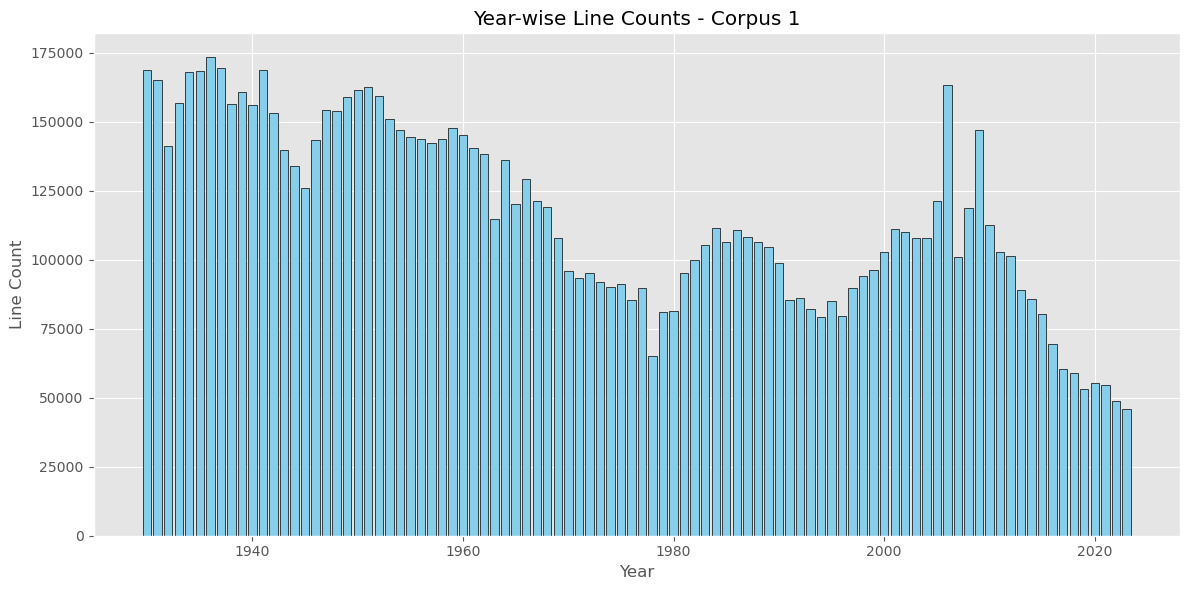

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def extract_counts(file_path, delimiter="|||||", skip_header=True):
    """
    Extracts year-wise line counts from a file.

    Args:
        file_path (str): Path to the file containing lines with year information.
        delimiter (str): Delimiter separating year information (default is "|||||").
        skip_header (bool): Whether to skip the header line in the input file (default is False).

    Returns:
        dict: A dictionary mapping years (integers) to their corresponding line counts (integers).
    """
    counts_dict = {}
    try:
        with open(file_path, "r", encoding="utf-8") as file:
            if skip_header:
                next(file)  # Skip the header line (if applicable)

            for line in file:
                parts = line.strip().split(delimiter)

                # Check if there are at least 5 elements after splitting
                if len(parts) >= 5:
                    # Extract the year from the fifth column
                    year_str = parts[4].strip()
                    # Check if the year is a valid digit
                    if year_str.isdigit():
                        # Increment the count for the corresponding year
                        year = int(year_str)
                        counts_dict[year] = counts_dict.get(year, 0) + 1

    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

    return counts_dict

def process_files(input_files):
    """
    Process each file and store year-wise counts.

    Args:
        input_files (dict): A dictionary mapping corpus names to their corresponding file paths.
    Returns:
        list: A list of dictionaries, each containing year-wise counts for a corpus.
    """
    corpus_counts = []
    for corpus, file_path in input_files.items():
        # Extract counts and append to corpus_counts
        corpus_counts.append(extract_counts(file_path, delimiter="|||||", skip_header=True))
        print(f"File: {file_path}, Counts: {corpus_counts[-1]}")
    return corpus_counts

def generate_plots(corpus_counts):
    """
    Generate histograms of year-wise line counts.

    Args:
        corpus_counts (list): A list of dictionaries, each containing year-wise counts for a corpus.
    """
    if not any(corpus_counts):
        print("No data found in the provided files. Cannot generate plots.")
        return

    plt.style.use('ggplot')
    fig, axs = plt.subplots(len(corpus_counts), figsize=(12, 6 * len(corpus_counts)))  # Create subplots for each corpus
    
    for i, counts_dict in enumerate(corpus_counts):
        years = list(counts_dict.keys())
        counts = list(counts_dict.values())

        # Dynamically adjust the plotting range based on min and max years
        min_year = min(years)
        max_year = max(years)

        # Plotting a bar chart for the current corpus on the corresponding subplot
        axs.bar(years, counts, color='skyblue', edgecolor='black')
        axs.set_xlabel('Year')
        axs.set_ylabel('Line Count')
        axs.set_title(f'Year-wise Line Counts - Corpus {i+1}')

    plt.tight_layout()
    plt.show()

def main():
    # Updated input file path for nyt_corpus.csv
    input_files = {
        'nyt_corpus': 'nyt_corpus_cleaned.csv',
    }

    corpus_counts = process_files(input_files)
    generate_plots(corpus_counts)

if __name__ == "__main__":
    main()

## Check the corpus for NAs (% missingness) - year range: 1930-2023

In [7]:
import pandas as pd

def count_nas_efficient(input_file):
    # Initialize counters for NA values and total rows
    na_counts = {}
    total_rows = {}

    # Open the CSV file for reading
    with open(input_file, 'r', encoding='utf-8') as file:
        # Skip header line
        next(file)

        # Iterate over each line in the file
        for line in file:
            # Split the line based on the delimiter
            row = line.strip().split('|||||')
            
            # Check if the row has at least 5 fields
            if len(row) >= 5:
                # Count NA values and total rows for each column
                for idx, value in enumerate(row):
                    if idx not in na_counts:
                        na_counts[idx] = 0
                        total_rows[idx] = 0
                    total_rows[idx] += 1  # Increment total rows for the column
                    if pd.isna(value) or value.strip() == 'NA':
                        na_counts[idx] += 1  # Increment NA count for the column
    
    # Print the number of NA values, total rows, and percentage of NA values in each column
    print("Number of NA values, total rows, and percentage of NA values in each column:")
    for idx in na_counts:
        total = total_rows[idx]
        na_count = na_counts[idx]
        percentage = (na_count / total) * 100 if total > 0 else 0
        print(f"Column {idx}: NA Count = {na_count}, Total Rows = {total}, Percentage = {percentage:.2f}%")
    
    # Optionally, you can save the counts to a CSV file or return them as needed
    # pd.DataFrame.from_dict(na_counts, orient='index').to_csv('na_counts.csv', header=True)


def main():
    input_file = 'nyt_corpus_cleaned.csv'  # Replace with your actual input file path
    count_nas_efficient(input_file)

if __name__ == "__main__":
    main()

Number of NA values, total rows, and percentage of NA values in each column:
Column 0: NA Count = 615, Total Rows = 10891026, Percentage = 0.01%
Column 1: NA Count = 2295, Total Rows = 10891026, Percentage = 0.02%
Column 2: NA Count = 4494865, Total Rows = 10891026, Percentage = 41.27%
Column 3: NA Count = 5979376, Total Rows = 10891026, Percentage = 54.90%
Column 4: NA Count = 0, Total Rows = 10891026, Percentage = 0.00%
Column 5: NA Count = 0, Total Rows = 10891026, Percentage = 0.00%
Column 6: NA Count = 0, Total Rows = 10891026, Percentage = 0.00%


## Inspect lines where rows have more than 7 columns

In [8]:
def print_rows_with_more_than_six_columns(input_file):
    # Open the CSV file for reading
    with open(input_file, 'r', encoding='utf-8') as file:
        # Skip header line
        next(file)

        # Initialize a counter for rows with more than 7 columns
        row_count = 0

        # Iterate over each line in the file
        for line_num, line in enumerate(file, start=1):
            # Split the line based on the delimiter
            row = line.strip().split('|||||')
            
            # Check if the row has more than 7 columns
            if len(row) > 7:
                print(f"Row {line_num} has {len(row)} columns:")
                print(line)
                print()  # Empty line for clarity
                row_count += 1
    
    # Print total number of rows with more than 7 columns
    print(f"Total rows with more than 7 columns: {row_count}")

# Example usage:
input_file = 'nyt_corpus_cleaned.csv'  # Replace with your actual input file path
print_rows_with_more_than_six_columns(input_file)


Total rows with more than 7 columns: 0


# 

# Plot annual line counts of target terms 

In [9]:
import pandas as pd
from collections import defaultdict

def extract_annual_counts(input_file='nyt_corpus.csv', delimiter='|||||', targets=None, min_year=1930, max_year=2023):
    if targets is None:
        targets = ["mental health", "mental illness", "mentally ill", "trauma", "traumatic", "schizophrenia", "schizophrenic", "narcissism", "narcissistic", "adhd", 
                   "autism", "autistic", "anxiety", "anxious", "prejudice"]
    
    # Dictionary to store annual counts for each target term and count type
    annual_counts = defaultdict(lambda: {target: {'count_snippet': 0, 'count_lead_paragraph': 0, 'count_title': 0} for target in targets})
    
    try:
        with open(input_file, 'r', newline='', encoding='utf-8') as file:
            next(file)  # Skip header row
            
            for line in file:
                parts = line.strip().split(delimiter)
                
                # Check if there are at least 6 elements after splitting
                if len(parts) >= 6:
                    title = parts[0].strip().lower()  # Title column, converted to lowercase
                    snippet = parts[2].strip().lower()  # Snippet column, converted to lowercase
                    lead_paragraph = parts[3].strip().lower()  # Lead paragraph column, converted to lowercase
                    year_str = parts[4].strip()  # Year column

                    # Check if the year is a valid digit
                    if year_str.isdigit():
                        year = int(year_str)
                        
                        # Ensure year is within the desired range
                        if min_year <= year <= max_year:
                            # Count occurrences in snippet
                            for target in targets:
                                if target in snippet:
                                    annual_counts[year][target]['count_snippet'] += 1
                            
                            # Count occurrences in lead paragraph
                            for target in targets:
                                if target in lead_paragraph:
                                    annual_counts[year][target]['count_lead_paragraph'] += 1
                                    
                            # Count occurrences in title
                            for target in targets:
                                if target in title:
                                    annual_counts[year][target]['count_title'] += 1
                        else:
                            print(f"Year {year} is outside the desired range ({min_year}-{max_year}). Skipping...")
                    else:
                        print(f"Invalid year format: {year_str}. Skipping...")
                        
    except FileNotFoundError:
        print(f"File not found: {input_file}")
    except Exception as e:
        print(f"Error processing file {input_file}: {e}")
    
    # Transform annual_counts into a list of dictionaries suitable for DataFrame conversion
    annual_counts_list = []
    for year in range(min_year, max_year + 1):
        for target in targets:
            annual_counts_list.append({
                'year': year,
                'target': target,
                'count_snippet': annual_counts[year][target]['count_snippet'],
                'count_lead_paragraph': annual_counts[year][target]['count_lead_paragraph'],
                'count_title': annual_counts[year][target]['count_title']
            })
    
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(annual_counts_list)
    
    return df

def main():
    # Updated input file path for nyt_corpus.csv
    input_file = 'nyt_corpus_cleaned.csv'
    
    df = extract_annual_counts(input_file, delimiter='|||||', min_year=1930, max_year=2023)
    
    # Save DataFrame to CSV
    output_file = 'nyt_targets_count.csv'
    df.to_csv(output_file, index=False)
    
    print(f"Saved DataFrame to {output_file}")

if __name__ == '__main__':
    main()

Saved DataFrame to nyt_targets_count.csv


## Plot combined annual target trends

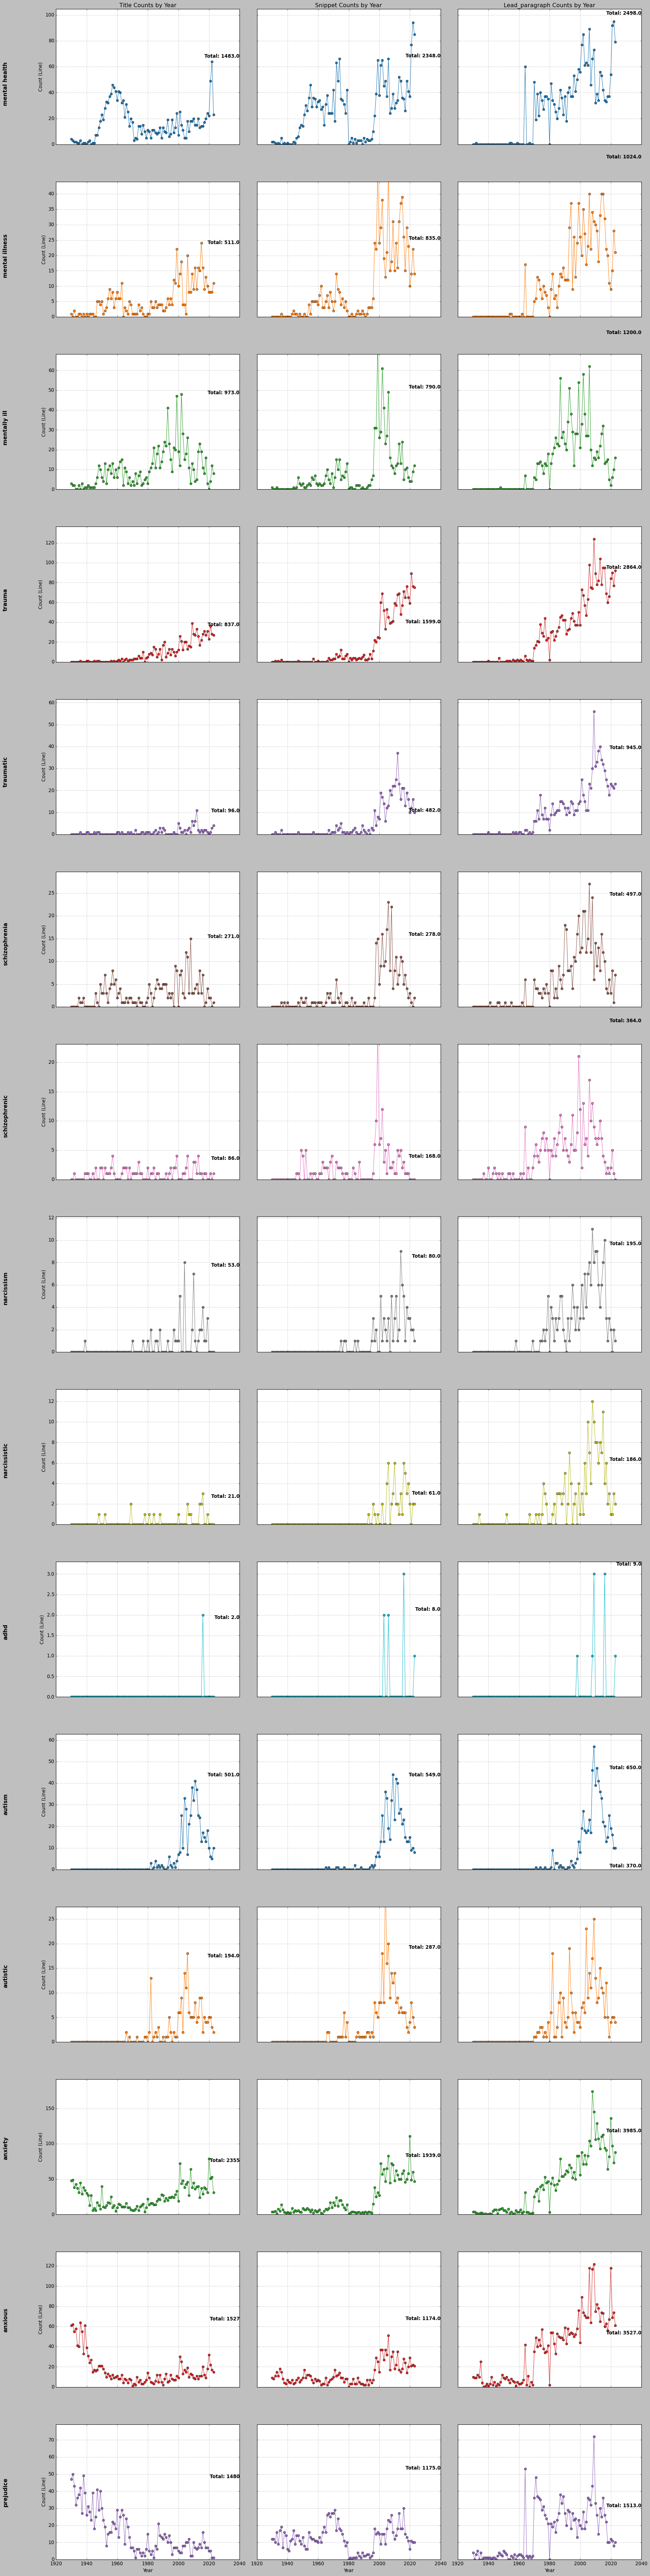

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_counts(df, save_path='nyt_targets_count_plot.png'):
    # Extract unique targets from the DataFrame
    targets = df['target'].unique()
    
    # Ensure all years are included, even if there are no counts
    all_years = range(df['year'].min(), df['year'].max() + 1)
    
    # Set up the figure and axes for plotting
    fig, axs = plt.subplots(len(targets), 3, figsize=(24, 6 * len(targets)), sharex='col', sharey='row')
    plt.subplots_adjust(hspace=0.4, wspace=0.2, left=0.2)  # Adjust left to make space for the labels
    
    count_types = ['count_title', 'count_snippet', 'count_lead_paragraph']  # Adjusted order of count types
    
    # Mimic classic style
    plt.style.use('classic')
    
    # Get a colormap with enough colors
    colors = list(mcolors.TABLEAU_COLORS.values())
    
    # Loop through each count type
    for j, count_type in enumerate(count_types):
        # Loop through each target and plot its count trajectories for the current count type
        for idx, target in enumerate(targets):
            target_df = df[(df['target'] == target) & (df[count_type] > 0)]  # Filter out zero counts
            
            # Create a series with all years, filling NaNs with 0 counts
            counts_series = target_df.set_index('year')[count_type].reindex(all_years).fillna(0)
            
            # Plot count trajectories for the current target and count type as lines
            color = colors[idx % len(colors)]  # Ensure different color for each target
            axs[idx, j].plot(counts_series.index, counts_series.values, marker='o', linestyle='-', color=color)
            
            # Calculate total counts for the current target and count type
            total_count = counts_series.sum()
            
            # Set labels and title for the current subplot
            if j == 0:
                axs[idx, j].set_ylabel('Count (Line)')
            if idx == 0:
                axs[idx, j].set_title(f'{count_type.replace("count_", "").capitalize()} Counts by Year')
            if idx == len(targets) - 1:
                axs[idx, j].set_xlabel('Year')
            
            # Add total counts text inside each subplot
            y_lim = axs[idx, j].get_ylim()
            x_lim = axs[idx, j].get_xlim()
            axs[idx, j].text(x_lim[1], y_lim[1], f'Total: {total_count}', 
                             verticalalignment='top', horizontalalignment='right', fontsize=12, weight='bold')
            
            axs[idx, j].grid(True)
            
            # Set the y-axis to start from 0 and add some space around the max value
            max_count = counts_series.max()
            axs[idx, j].set_ylim(bottom=0, top=max_count * 1.1)
    
    # Add target labels to the left side, adjusting the vertical alignment
    for idx, target in enumerate(targets):
        fig.text(0.06, 1 - (idx + 0.5) / len(targets), target, va='center', ha='center', fontsize=14, rotation=90, weight='bold')
    
    # Save plot
    plt.tight_layout(rect=[0.1, 0, 1, 1])  # Adjust layout to accommodate the target labels
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()

def main():
    # Load the CSV file into a DataFrame
    df = pd.read_csv('nyt_targets_count.csv')
    
    # Plot the counts
    plot_counts(df)

if __name__ == '__main__':
    main()

# Get target appearances in the corpus (not per line)

In [12]:
import pandas as pd
from collections import defaultdict

def extract_annual_counts(input_file='nyt_corpus.csv', delimiter='|||||', targets=None, min_year=1930, max_year=2023):
    if targets is None:
        targets = ["mental health", "mental illness", "mentally ill", 
                   "trauma", "traumatic", "ptsd", "post-traumatic stress disorder", "post traumatic stress disorder"
                   "schizophrenia", "schizophrenic", 
                   "narcissism", "narcissistic", 
                   "adhd", "attention deficit disorder", "attention deficit hyperactivity disorder", "hyperactive-impusive adhd", 
                   "autism", "autistic", 
                   "anxiety", "anxious", 
                   "prejudice",
                   "obsessive-compulsive disorder", "ocd", "obsessive compulsive disorder"]
    
    # Dictionary to store annual counts for each target term and count type
    annual_counts = defaultdict(lambda: {target: {'count_snippet': 0, 'count_lead_paragraph': 0, 'count_title': 0} for target in targets})
    
    try:
        with open(input_file, 'r', newline='', encoding='utf-8') as file:
            next(file)  # Skip header row
            
            for line in file:
                parts = line.strip().split(delimiter)
                
                # Check if there are at least 6 elements after splitting
                if len(parts) >= 6:
                    title = parts[0].strip().lower()  # Title column, converted to lowercase
                    snippet = parts[2].strip().lower()  # Snippet column, converted to lowercase
                    lead_paragraph = parts[3].strip().lower()  # Lead paragraph column, converted to lowercase
                    year_str = parts[4].strip()  # Year column

                    # Check if the year is a valid digit
                    if year_str.isdigit():
                        year = int(year_str)
                        
                        # Ensure year is within the desired range
                        if min_year <= year <= max_year:
                            # Count occurrences in snippet
                            for target in targets:
                                if target in snippet:
                                    annual_counts[year][target]['count_snippet'] += snippet.count(target)
                            
                            # Count occurrences in lead paragraph
                            for target in targets:
                                if target in lead_paragraph:
                                    annual_counts[year][target]['count_lead_paragraph'] += lead_paragraph.count(target)
                                    
                            # Count occurrences in title
                            for target in targets:
                                if target in title:
                                    annual_counts[year][target]['count_title'] += title.count(target)
                        else:
                            print(f"Year {year} is outside the desired range ({min_year}-{max_year}). Skipping...")
                    else:
                        print(f"Invalid year format: {year_str}. Skipping...")
                        
    except FileNotFoundError:
        print(f"File not found: {input_file}")
    except Exception as e:
        print(f"Error processing file {input_file}: {e}")
    
    # Transform annual_counts into a list of dictionaries suitable for DataFrame conversion
    annual_counts_list = []
    for year in range(min_year, max_year + 1):
        for target in targets:
            annual_counts_list.append({
                'year': year,
                'target': target,
                'count_snippet': annual_counts[year][target]['count_snippet'],
                'count_lead_paragraph': annual_counts[year][target]['count_lead_paragraph'],
                'count_title': annual_counts[year][target]['count_title']
            })
    
    # Convert the list of dictionaries to a DataFrame
    df = pd.DataFrame(annual_counts_list)
    
    return df

def main():
    # Updated input file path for nyt_corpus.csv
    input_file = 'nyt_corpus.csv'
    
    df = extract_annual_counts(input_file, delimiter='|||||', min_year=1930, max_year=2023)
    
    # Save DataFrame to CSV
    output_file = 'nyt_targets_count_corpus.csv'
    df.to_csv(output_file, index=False)
    
    print(f"Saved DataFrame to {output_file}")

if __name__ == '__main__':
    main()


Year 1851 is outside the desired range (1930-2023). Skipping...
Year 1851 is outside the desired range (1930-2023). Skipping...
Year 1851 is outside the desired range (1930-2023). Skipping...
Year 1851 is outside the desired range (1930-2023). Skipping...
Year 1851 is outside the desired range (1930-2023). Skipping...
Year 1851 is outside the desired range (1930-2023). Skipping...
Year 1851 is outside the desired range (1930-2023). Skipping...
Year 1851 is outside the desired range (1930-2023). Skipping...
Year 1851 is outside the desired range (1930-2023). Skipping...
Year 1851 is outside the desired range (1930-2023). Skipping...
Year 1851 is outside the desired range (1930-2023). Skipping...
Year 1851 is outside the desired range (1930-2023). Skipping...
Year 1851 is outside the desired range (1930-2023). Skipping...
Year 1851 is outside the desired range (1930-2023). Skipping...
Year 1851 is outside the desired range (1930-2023). Skipping...
Year 1851 is outside the desired range (

## Plot target corpus appearance trends

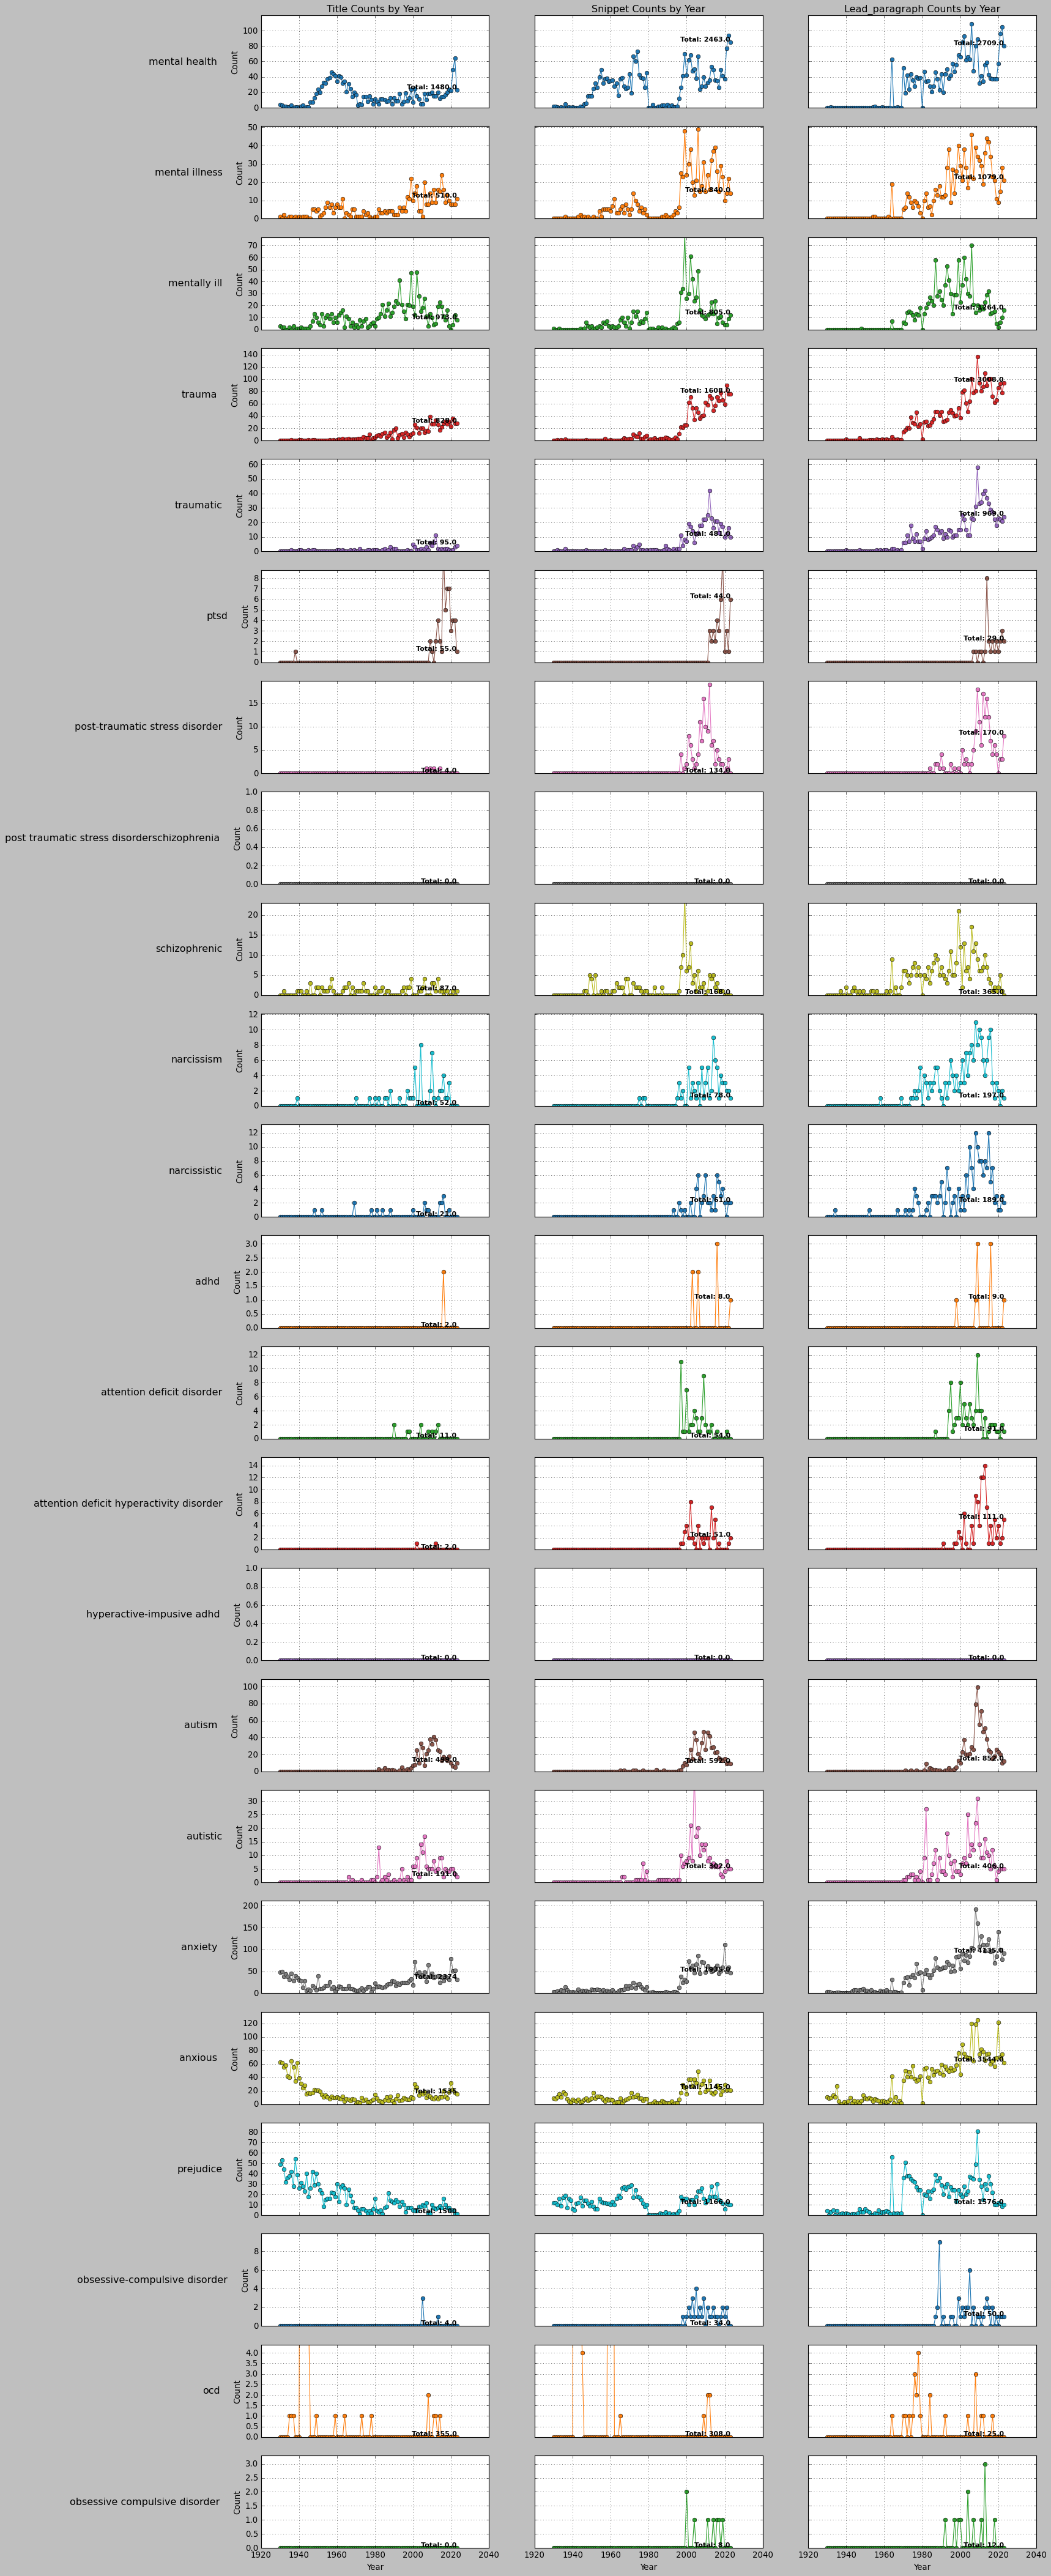

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_counts(df, save_path='nyt_targets_count_corpus_plot.png'):
    # Extract unique targets from the DataFrame
    targets = df['target'].unique()
    
    # Ensure all years are included, even if there are no counts
    all_years = range(df['year'].min(), df['year'].max() + 1)
    
    # Set up the figure and axes for plotting
    fig, axs = plt.subplots(len(targets), 3, figsize=(18, 2.5 * len(targets)), sharex='col', sharey='row')
    
    count_types = ['count_title', 'count_snippet', 'count_lead_paragraph']
    
    # Mimic classic style
    plt.style.use('classic')
    
    # Get a colormap with enough colors
    colors = list(mcolors.TABLEAU_COLORS.values())
    
    # Loop through each count type
    for j, count_type in enumerate(count_types):
        # Loop through each target and plot its count trajectories for the current count type
        for idx, target in enumerate(targets):
            target_df = df[(df['target'] == target) & (df[count_type] > 0)]  # Filter out zero counts
            
            # Create a series with all years, filling NaNs with 0 counts
            counts_series = target_df.set_index('year')[count_type].reindex(all_years).fillna(0)
            
            # Plot count trajectories for the current target and count type as lines
            color = colors[idx % len(colors)]  # Ensure different color for each target
            axs[idx, j].plot(counts_series.index, counts_series.values, marker='o', linestyle='-', color=color)
            
            # Calculate total counts for the current target and count type
            total_count = counts_series.sum()
            
            # Set labels and title for the current subplot
            if j == 0:
                axs[idx, j].set_ylabel('Count')
            if idx == 0:
                axs[idx, j].set_title(f'{count_type.replace("count_", "").capitalize()} Counts by Year')
            if idx == len(targets) - 1:
                axs[idx, j].set_xlabel('Year')
            
            # Add total counts text near the last data point of each subplot
            last_year = counts_series.index[-1]
            last_value = counts_series.values[-1]
            axs[idx, j].text(last_year, last_value, f'Total: {total_count}', 
                             verticalalignment='bottom', horizontalalignment='right', fontsize=10, weight='bold')
            
            axs[idx, j].grid(True)
            
            # Set the y-axis to start from 0 and add some space around the max value
            max_count = counts_series.max()
            if max_count == 0:
                axs[idx, j].set_ylim(bottom=0, top=1)  # Avoid singular transformation by setting top to 1
            else:
                axs[idx, j].set_ylim(bottom=0, top=max_count * 1.1)
            
            # Add target label on the left side of the first column
            if j == 0:
                axs[idx, j].annotate(target, xy=(0, 0.5), xytext=(-axs[idx, j].yaxis.labelpad - 15, 0),
                                     xycoords=axs[idx, j].yaxis.label, textcoords='offset points',
                                     size='large', ha='right', va='center')

    # Adjust subplot positions manually
    plt.subplots_adjust(left=0.1, right=0.98, top=0.95, bottom=0.05, hspace=0.2, wspace=0.2)
    
    # Save plot
    plt.savefig(save_path, bbox_inches='tight')
    plt.show()

def main():
    # Load the CSV file into a DataFrame
    df = pd.read_csv('nyt_targets_count_corpus.csv')
    
    # Plot the counts
    plot_counts(df)

if __name__ == '__main__':
    main()